<a href="https://colab.research.google.com/github/Bhuvankambley2003/Parkinson-s_disease_Neural_Network/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('parkinsons.data')
dataset = data  # use the same variable consistently


In [ ]:
feature_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                   'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                   'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                   'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
                   'spread2', 'D2', 'PPE']

In [ ]:
data = pd.read_csv('parkinsons.data')
dataset = data  # use the same variable consistently


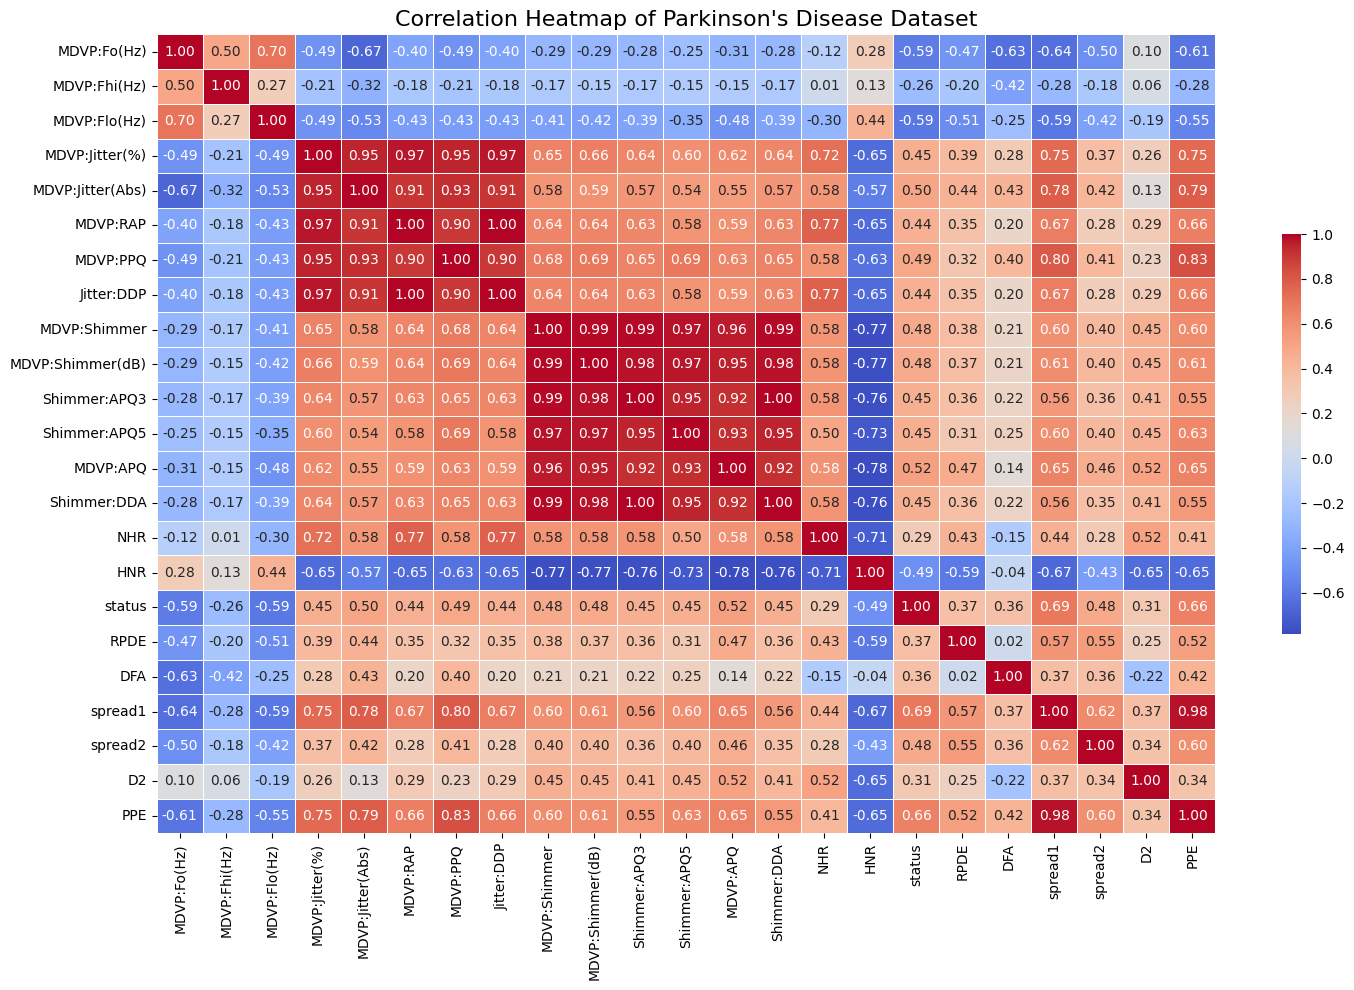

In [ ]:
numeric_data = dataset.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})

# Add title and adjust layout
plt.title('Correlation Heatmap of Parkinson\'s Disease Dataset', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
# Display the heatmap
plt.show()

In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
dataset.shape

(1133, 24)

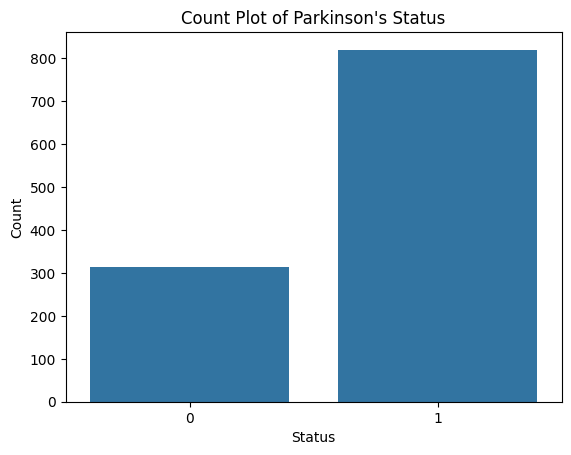

In [ ]:

sns.countplot(x='status', data=dataset)
plt.title('Count Plot of Parkinson\'s Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.savefig('count_plot.png')
plt.show()

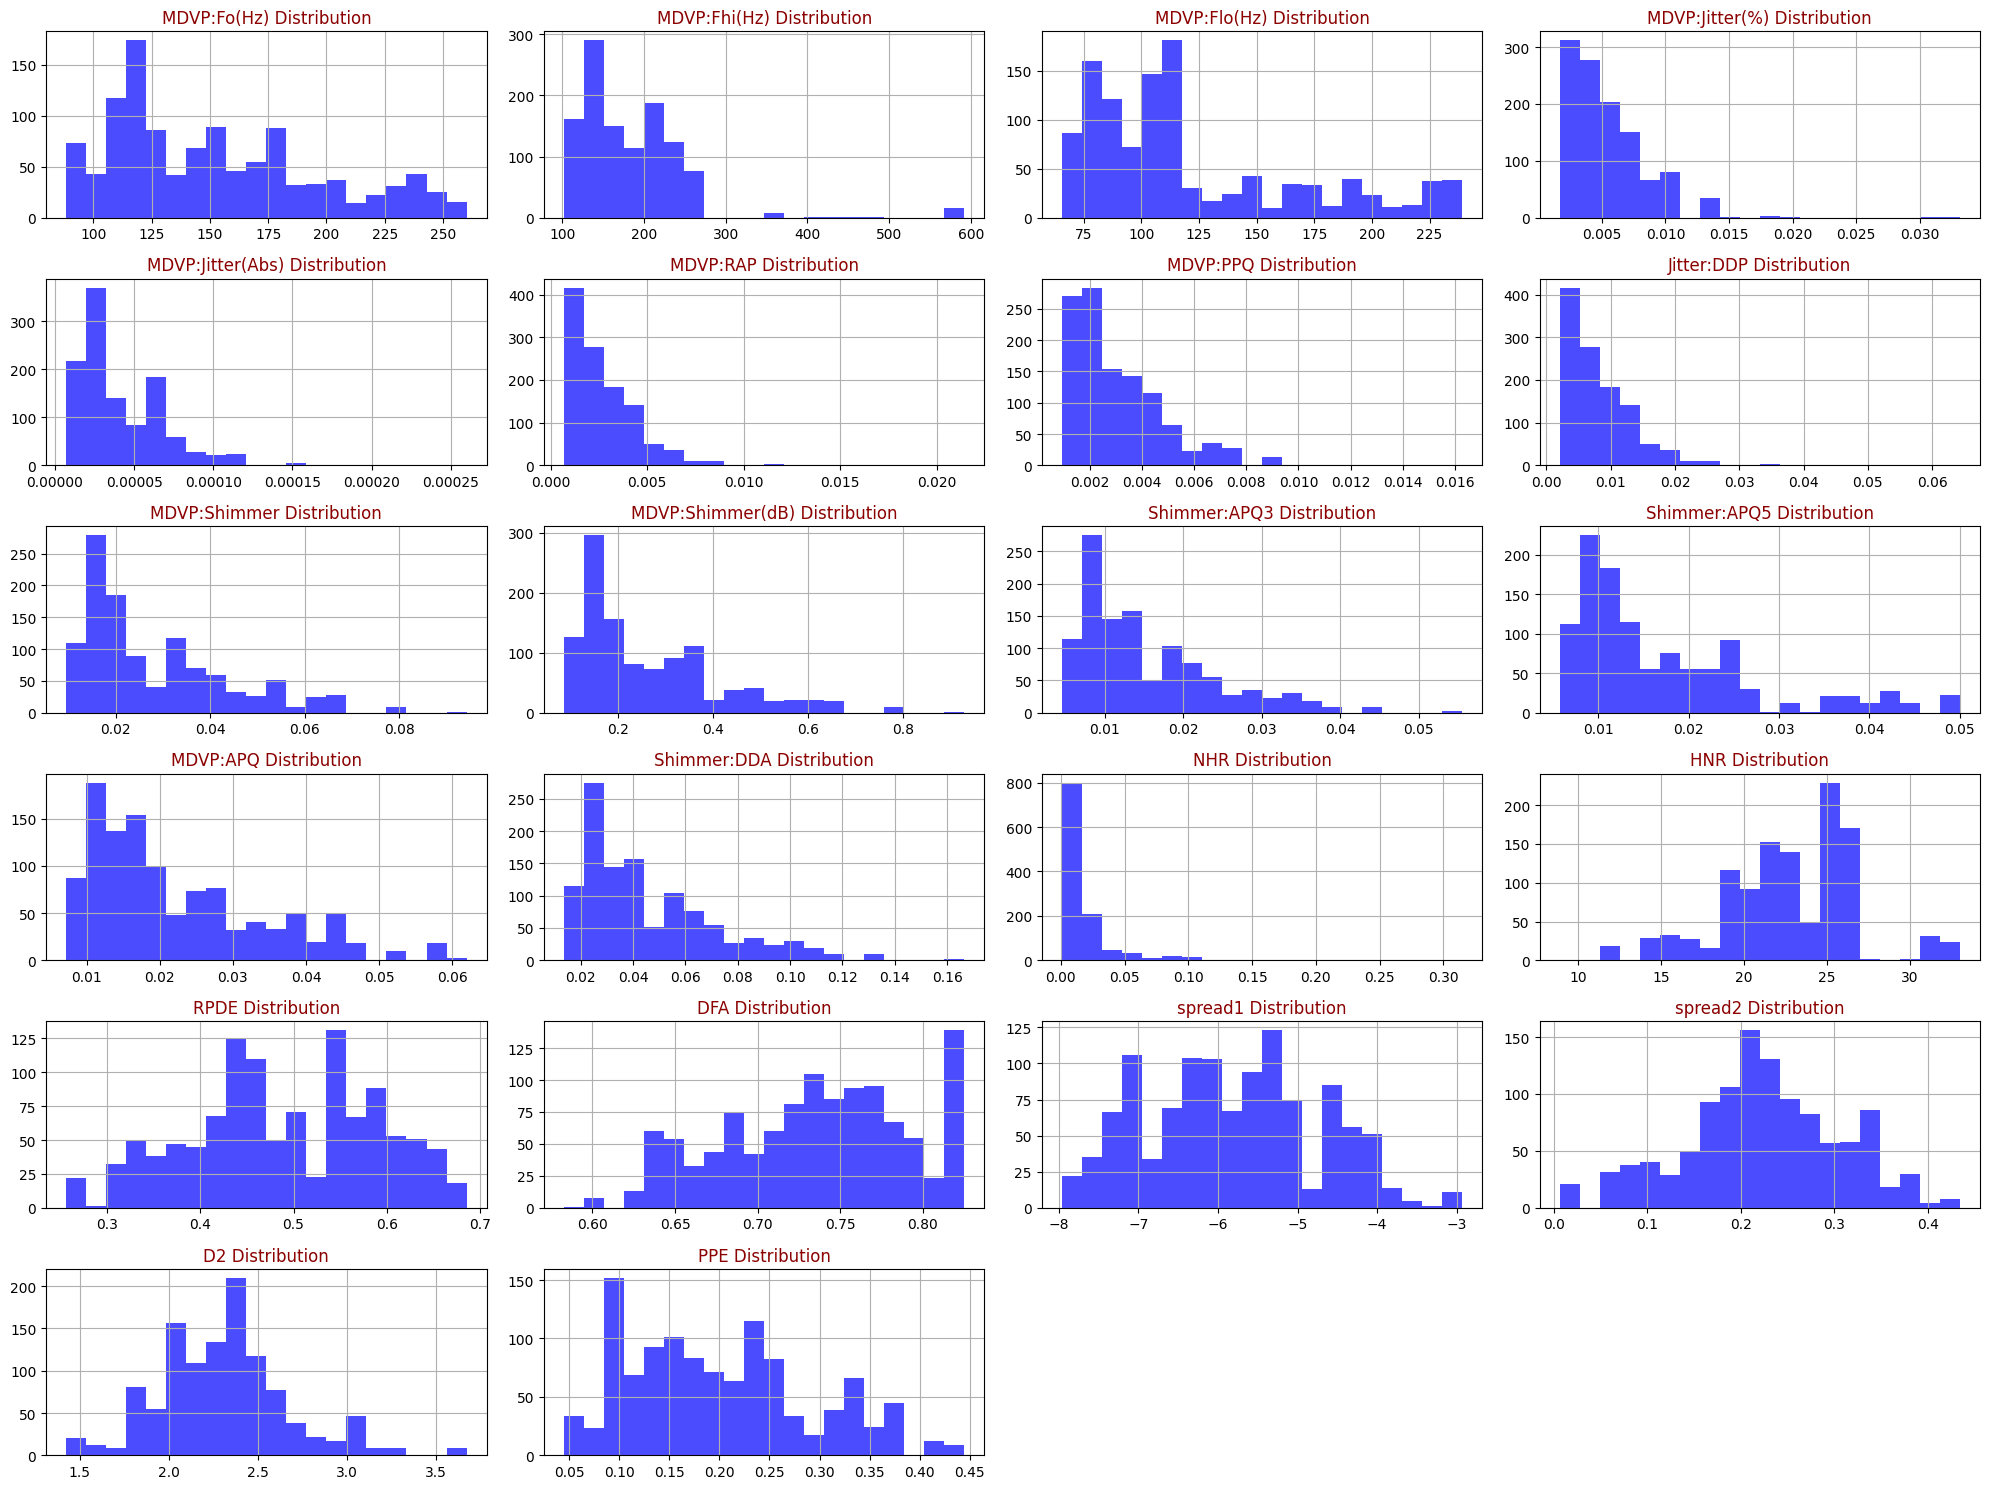

In [ ]:
def plot_histograms(df, features, rows, cols):
    fig = plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        df[feature].hist(bins=20, ax=ax, facecolor='blue', alpha=0.7)
        ax.set_title(feature + " Distribution", color='darkred')
    fig.tight_layout()
    plt.savefig('histogram.png')
    plt.show()


plot_histograms(dataset, feature_columns, 6, 4)


In [ ]:
dataset['status'].value_counts()

,count
status,
1,820
0,313


In [ ]:
X = data.drop(columns=['name','status'], axis=1)
Y = data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
188      174.188       230.978        94.261         0.00459   
189      209.516       253.017        89.488         0.00564   
190      174.688       240.005        74.287         0.01360   
191      198.764       396.961        74.904         0.00740   
192      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
188    0
189    0
190    0
191    0
192    0
Name: status, Length: 193, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
import joblib
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
print(X_train)

[[ 0.19968051 -0.00323433 -0.91953733 ... -0.09353551  0.73822409
   0.06572774]
 [ 0.62871965 -0.01089985  0.88730835 ...  1.06515464  1.77297446
  -0.10003661]
 [ 2.21419784  0.76084389  2.80798283 ... -0.70087436 -0.78286251
  -1.21170756]
 ...
 [-0.87962958 -0.65770429 -0.12925467 ...  1.22567835 -0.50310942
  -0.23064885]
 [-0.33256877  0.17463555 -0.77309092 ... -0.22408373 -0.50177928
   0.2644572 ]
 [ 2.09805856  0.47097829  2.36297397 ... -1.89343022 -0.34663298
  -1.16198252]]


Accuracy score of training data :  89.58333333333334
Accuracy score of test data :  81.63265306122449


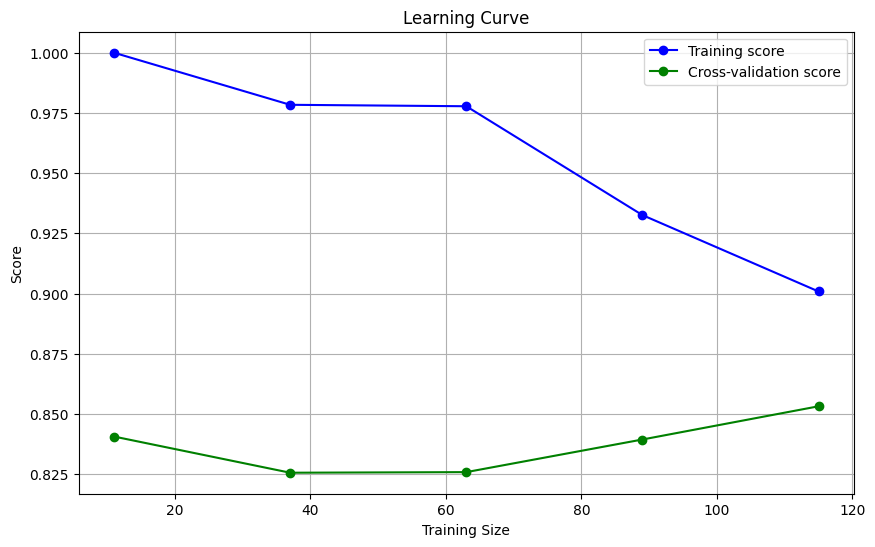

In [ ]:
#support vector machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
model = SVC(kernel='linear')
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy*100)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy*100)
joblib.dump(model, 'svm_model.joblib')

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, scoring='accuracy')

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='green', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curve_svc.png')
plt.show()


In [ ]:
input_data = (148.272,164.989,142.299	,0.00459,0.00003,0.0025	,0.00256,0.0075,0.0419,	0.383,	0.02383,0.02521,0.03051,0.0715,0.01914	,18.78,	0.454444,0.734504,-5.952058,0.08784,2.344336,0.186489)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[1]
The Person has Parkinsons


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


data.dtypes

Epoch 1/146
12/12 [==============================] - 2s 65ms/step - loss: 0.5615 - accuracy: 0.7043 - val_loss: 0.5312 - val_accuracy: 0.7241
Epoch 2/146
12/12 [==============================] - 0s 6ms/step - loss: 0.3489 - accuracy: 0.8087 - val_loss: 0.4840 - val_accuracy: 0.7586
Epoch 3/146
12/12 [==============================] - 0s 6ms/step - loss: 0.2562 - accuracy: 0.8696 - val_loss: 0.4696 - val_accuracy: 0.7586
Epoch 4/146
12/12 [==============================] - 0s 6ms/step - loss: 0.1992 - accuracy: 0.9130 - val_loss: 0.4598 - val_accuracy: 0.7241
Epoch 5/146
12/12 [==============================] - 0s 7ms/step - loss: 0.1413 - accuracy: 0.9565 - val_loss: 0.5280 - val_accuracy: 0.6897
Epoch 6/146
12/12 [==============================] - 0s 8ms/step - loss: 0.1042 - accuracy: 0.9652 - val_loss: 0.5154 - val_accuracy: 0.7931
Epoch 7/146
12/12 [==============================] - 0s 8ms/step - loss: 0.0704 - accuracy: 0.9913 - val_loss: 0.5663 - val_accuracy: 0.7586
Epoch 8/146


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


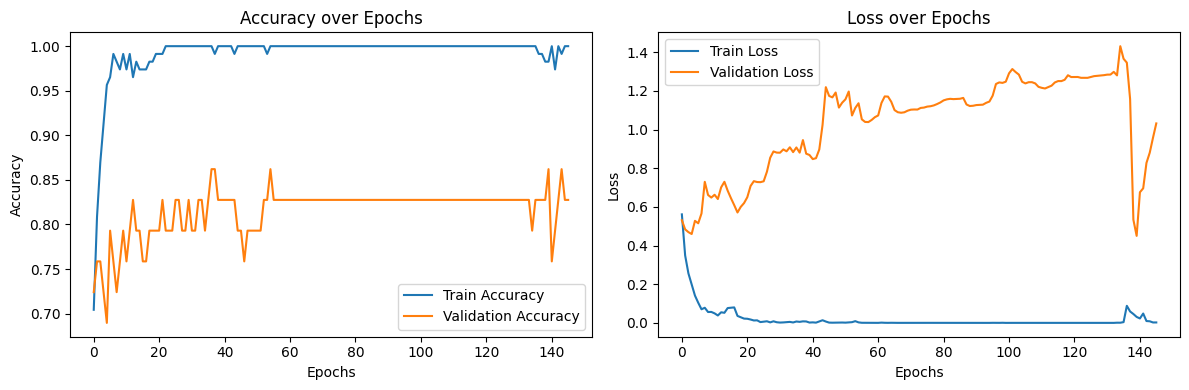

In [ ]:
#neural network
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load your data (assuming it's already loaded into a DataFrame 'df')
# df = pd.read_csv('your_dataset.csv')

# Define feature columns and target column
feature_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                   'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                   'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                   'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
                   'spread2', 'D2', 'PPE']


X = data[feature_columns].values
Y = data['status'].values

# Split the data into training and testing sets with a 75:25 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=146, batch_size=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# print(classification_report(Y_test, log_reg_preds))
# Save the model
model.save('parkinsons_ann_model.h5')

# Plot training & validation accuracy and loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.savefig('neural_network_accuracy.png')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.tight_layout()
plt.show()


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg_preds = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(Y_test, log_reg_preds)
print(f"Logistic Regression Test Accuracy: {log_reg_accuracy * 100:.2f}%")
print(classification_report(Y_test, log_reg_preds))


Random Forest Test Accuracy: 89.80%
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.92      0.95      0.94        38

    accuracy                           0.90        49
   macro avg       0.86      0.84      0.85        49
weighted avg       0.90      0.90      0.90        49



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


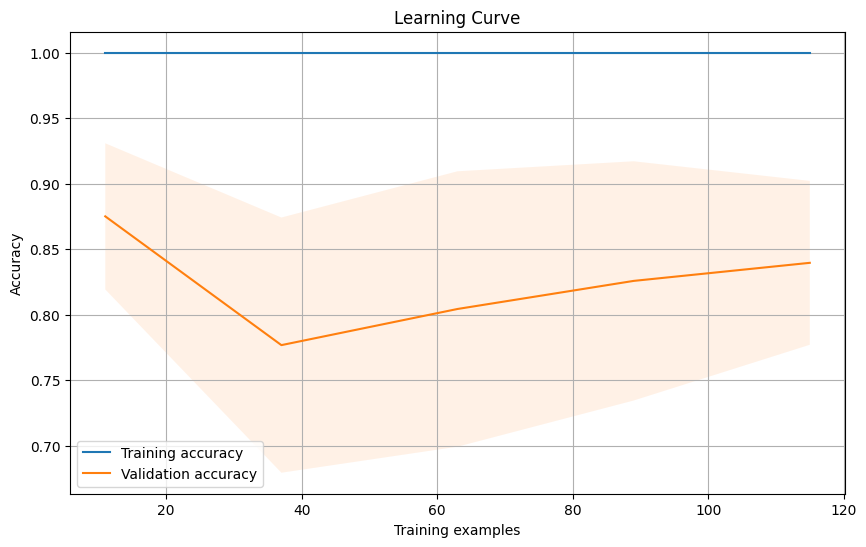

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=80, max_depth=7, random_state=2)
rf_model.fit(X_train, Y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_preds)
print(f"Random Forest Test Accuracy: {rf_accuracy * 100:.2f}%")
print(classification_report(Y_test, rf_preds))
joblib.dump(rf_model, 'random_forest_model.joblib')

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, Y_train, cv=5, n_jobs=-1, scoring='accuracy')

# Calculate mean and std deviation of training and testing scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.savefig('learning_curve_randomforest.png')
plt.show()


In [ ]:
!pip install streamlit


In [ ]:
import joblib

print(f"support vector machine Regression Test Accuracy: {test_data_accuracy * 100:.2f}%")


print(f"Random Forest Test Accuracy: {rf_accuracy * 100:.2f}%")


print(f"Test Accuracy of neural network: {test_accuracy * 100:.2f}%")

accuracies = {
    'svm_accuracy': test_data_accuracy,
    'rf_accuracy': rf_accuracy,
    'nn_accuracy': 0.9384
}

joblib.dump(accuracies, 'accuracies.joblib')

support vector machine Regression Test Accuracy: 81.63%
Random Forest Test Accuracy: 89.80%
Test Accuracy of neural network: 91.84%


['accuracies.joblib']

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load models
svm_model = joblib.load('svm_model.joblib')
rf_model = joblib.load('random_forest_model.joblib')
nn_model = tf.keras.models.load_model('parkinsons_ann_model.h5')
scaler = joblib.load('scaler.joblib')
accuracies = joblib.load('accuracies.joblib')

# Define the feature names
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
                 'spread2', 'D2', 'PPE']

# Define the main function
def main():


    # Navigation sidebar
    page = st.sidebar.radio("Select Page", ["Home", "Model"])

    if page == "Home":
        show_home_page()
    elif page == "Model":
        show_model_page()

def show_home_page():
    st.header("About Parkinson's Disease")
    st.image('/content/drive/MyDrive/parkinsons project/parkinsons_image.jpg',  use_column_width=True)
    st.write("""

    Parkinson's disease is a progressive neurological disorder that affects movement. It occurs when the nerve cells in the brain that produce dopamine are damaged or die. This leads to symptoms such as tremors, stiffness, slowness of movement, and balance problems.

    Key symptoms include:
    - Tremors or shaking, usually starting in one hand

    - Muscle stiffness or rigidity

    - Slowness of movement

    - Impaired balance and coordination

    What causes Parkinson's disease?

    The exact cause of Parkinson's disease is unknown, but researchers believe it's a combination of genetic and environmental factors.

    -Genetics: Having certain genes increases the risk of developing Parkinson's, but these genes don't guarantee you'll get it.


    -Environment: Exposure to certain toxins  environmental factors may also play a role, but the risk is likely small.

    Parkinson's disease is a progressive condition, which means that symptoms generally worsen over time. Early diagnosis and treatment can help manage symptoms and improve quality of life.

    Parkinson's disease can cause changes in several voice features, which can be analyzed to aid in diagnosis:

    Pitch: The voice may become softer and lower-pitched due to reduced vocal fold vibration.

    Volume: Speech volume may decrease due to weaker vocal cord function and reduced breath support.

    Tremor: A tremor in the vocal cords can cause a shaky or quivering voice.

    Jitter: Rapid variations in pitch can make the voice sound unsteady.

    Shimmer: Variations in amplitude can make the voice sound breathy or raspy.

    For more information, please visit the [Parkinson's Foundation](https://www.parkinson.org/).
    """)

def show_model_page():
    st.header("Parkinson's Disease Prediction")

    st.header("Count Plot")
    st.image('count_plot.png', caption='Count Plot', use_column_width=True)

    st.header("Histogram of Features")
    st.image('histogram.png', caption='Histogram of Features', use_column_width=True)

    st.header("Heatmap of dataset")
    st.image('correlation_heatmap.png', caption='Heatmap of Features', use_column_width=True)

    # Allow user to choose input method
    input_method = st.radio("Choose input method:", ('Sliders', 'Direct Input'))

    # Create inputs based on selected method
    inputs = [148.272,164.989,142.299,0.00459,0.00003,0.0025,0.00256,0.0075,0.0419,0.383,0.02383,0.02521,0.03051,0.0715,0.01914,18.78,0.454444,0.734504,-5.952058,0.08784,2.344336,0.186489]

    # inputs = []
    # for feature in feature_names:
    #     if input_method == 'Sliders':
    #         value = st.slider(f"Input {feature}", min_value=-1000.0, max_value=1000.0, step=0.01, format="%.6f")
    #     else:
    #         value = st.text_input(f"Input {feature}", value="0.0", max_chars=10)
    #         value = float(value)
    #     inputs.append(value)

    # Convert inputs to numpy array and scale
    input_data = np.array(inputs).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)

    # Choose model for prediction
    model_choice = st.selectbox("Choose the model for prediction:", ['SVM', 'Random Forest', 'Neural Network'])

    # Make prediction based on chosen model
    if model_choice == 'SVM':
        prediction = svm_model.predict(input_data_scaled)
        model_accuracy = accuracies['svm_accuracy']*100
        st.header("SVM Accuracy")
        st.image('learning_curve_svc.png', caption='Learning curve SVM', use_column_width=True)

    elif model_choice == 'Random Forest':
        prediction = rf_model.predict(input_data_scaled)
        model_accuracy = accuracies['rf_accuracy']*100
        st.header("Random Forest Accuracy")
        st.image('learning_curve_randomforest.png', caption='Learning curve Random Forest', use_column_width=True)

    else:
        prediction = (nn_model.predict(input_data_scaled) > 0.5).astype(int)
        model_accuracy = accuracies['nn_accuracy']*100
        st.header("Neural Network Accuracy")
        st.image('neural_network_accuracy.png', caption='Learning curve Neural Network', width=900)

    # Display prediction result
    st.write(f"### {model_choice} Prediction: {'The person has Parkinsons' if prediction[0] == 1 else 'The person has NO Parkinsons'}")

    # Display model accuracy
    st.write(f"### {model_choice} Accuracy: {model_accuracy:.4f}")

    # Option to display accuracies
    if st.button("Show All Model Accuracies"):
        svm_accuracy = accuracies['svm_accuracy']
        rf_accuracy = accuracies['rf_accuracy']
        nn_accuracy = accuracies['nn_accuracy']

        st.write("### Model Accuracies")
        accuracies_list = [svm_accuracy, rf_accuracy, nn_accuracy]
        models = ['SVM', 'Random Forest', 'Neural Network']

        # Plot accuracies as a line plot
        fig, ax = plt.subplots()
        ax.plot(models, accuracies_list, marker='o', linestyle='-', color='b', linewidth=2)
        ax.set_ylim([0, 1])
        ax.set_ylabel('Accuracy')
        ax.set_title('Model Accuracies')

        st.pyplot(fig)

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.199.27:8501

your url is: https://stale-mirrors-sneeze.loca.lt
2024-07-31 06:52:18.456423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 06:52:18.456476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 06:52:18.457948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 06:52:19.677688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
input_data = (148.272,164.989,142.299	,0.00459,0.00003,0.0025	,0.00256,0.0075,0.0419,	0.383,	0.02383,0.02521,0.03051,0.0715,0.01914	,18.78,	0.454444,0.734504,-5.952058,0.08784,2.344336,0.186489)
svm_model = joblib.load('svm_model.joblib')
rf_model = joblib.load('random_forest_model.joblib')
nn_model = tf.keras.models.load_model('parkinsons_ann_model.h5')
input_dataa = np.array(input_data).reshape(1, -1)

input_dataaa = scaler.transform(input_dataa)


svm_prediction = svm_model.predict(input_dataaa)
rf_prediction = rf_model.predict(input_dataaa)
nn_prediction = (nn_model.predict(input_dataaa) > 0.5).astype(int)


print(svm_prediction)
print(rf_prediction)
print(nn_prediction)




1/1 [==============================] - 0s 156ms/step
[1]
[1]
[[1]]


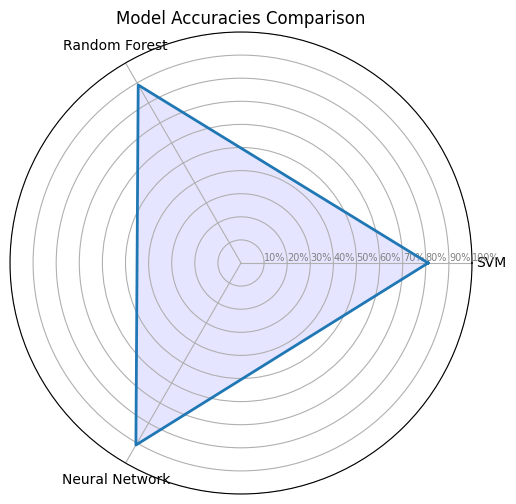

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Replace these with your actual accuracy scores
svm_accuracy = 0.81
rf_accuracy = 0.89
nn_accuracy = 0.91

# Data for the radar chart
labels = ['SVM', 'Random Forest', 'Neural Network']
values = [svm_accuracy, rf_accuracy, nn_accuracy]

# Number of variables we're plotting
num_vars = len(labels)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Ensure the plot is a circle

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], labels)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"], color="grey", size=7)
plt.ylim(0, 1)

# Plot data
values += values[:1]  # Ensure the plot is a circle
ax.plot(angles, values, linewidth=2, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Model Accuracies Comparison')
plt.show()
